   # AI Generated Image Detection (ViT)

# Importing Libraries 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from vit_pytorch import ViT
from torch import nn
from torch.nn import Module
from torch.nn import functional as F
from torch.utils.data import TensorDataset ,DataLoader
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Loading Train dataset

In [2]:
train_loc = '/Users/suyashk11/Desktop/VLG_Project/train.csv'
train = pd.read_csv(train_loc)
train

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [3]:
x = train.iloc[:,1:]
x

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,-0.128052,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,-1.656990,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,0.848524,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,0.717341,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,0.778445,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,0.261597,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,1.243559,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,0.053378,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,0.725914,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [4]:
y = train['labels']
y

0       0
1       1
2       1
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: labels, Length: 5250, dtype: int64

labels
0    3850
1    1400
Name: f_0, dtype: int64


([<matplotlib.patches.Wedge at 0x16e1837d0>,
 [Text(-0.7360437078139774, 0.817459271271329, '0'),
  Text(0.7360437843500347, -0.8174592023579402, '1')],
 [Text(-0.4014783860803513, 0.4458868752389067, '73%'),
  Text(0.4014784278272916, -0.44588683764978554, '27%')])

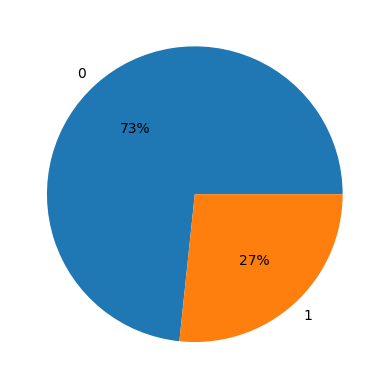

In [5]:
dist = train.groupby('labels').count()['f_0']
print(dist)
plt.pie(dist,labels = dist.index , autopct = '%0.0f%%')

* The dataset has 73 % of labels as 0

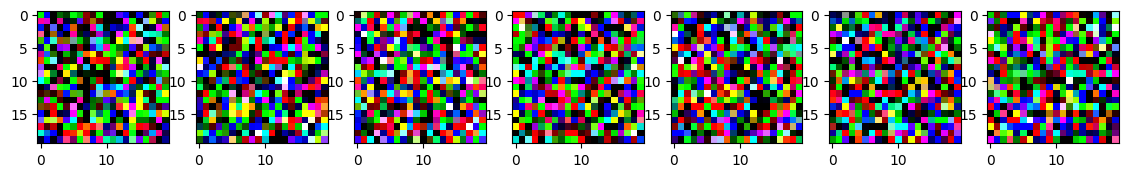

In [6]:
plt.figure(figsize=(16,16))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(torch.clamp(torch.from_numpy(x.iloc[i,:].values.reshape(20,20,3).astype(float)),0,1))

In [7]:
inp = torch.from_numpy(x.values.reshape(len(x),3,20,20).astype(float))
inp = torch.clamp(inp,0,1)
inp

tensor([[[[0.0000e+00, 9.7845e-01, 0.0000e+00,  ..., 4.5184e-02,
           0.0000e+00, 7.0296e-01],
          [0.0000e+00, 5.5401e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0000e+00, 0.0000e+00],
          [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           8.3506e-01, 0.0000e+00],
          ...,
          [3.5884e-01, 0.0000e+00, 2.1953e-01,  ..., 2.9834e-01,
           3.8864e-01, 1.7029e-01],
          [8.2437e-01, 0.0000e+00, 5.4134e-01,  ..., 0.0000e+00,
           0.0000e+00, 7.8418e-01],
          [4.8284e-01, 1.0000e+00, 3.8534e-01,  ..., 5.2226e-01,
           0.0000e+00, 3.5099e-02]],

         [[0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 7.4908e-01,
           0.0000e+00, 0.0000e+00],
          [9.6579e-01, 2.5935e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0000e+00, 0.0000e+00],
          [1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0825e-01, 1.0000e+00],
          ...,
          [1.3879e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000

# Vision Transformer Training

In [34]:
from torch.utils.data import TensorDataset, DataLoader

class VisionTransformer(nn.Module):
    def __init__(self, classes, img_size, patch_size, dim):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        patches = (img_size / patch_size) ** 2
        patch_dim = 3 * (patch_size ** 2)
        self.patch_embedding = nn.Conv2d(3, dim, kernel_size=patch_size, stride=patch_size)
        self.pos_encoding = nn.Parameter(torch.zeros(1, int(patches), dim))
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model=dim, nhead=8), num_layers=6)
        self.fc = nn.Linear(dim, classes)

    def forward(self, x):
        batch_size, channels, height, width = x.shape  
        x = self.patch_embedding(x)
        x = x.flatten(2).permute(0, 2, 1)
        seq_len = x.shape[1]
        pos_encoding = self.pos_encoding.expand(batch_size, -1, -1)
        x = torch.cat([pos_encoding, x], dim=1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.fc(x)
        return x

classes = 2
img_size = 20
patch_size = 5
dim = 128
batch_size = 64
num_epochs=25

train_dataset = TensorDataset(inp, torch.from_numpy(np.array(y)))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

vit = VisionTransformer(classes, img_size, patch_size, dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit.parameters(), lr=0.0001)

loss_df = []
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f'epoch {epoch + 1}', unit='batch', ncols=80)

        for images, labels in progress_bar:
            outputs = model(images.float())
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix({'Loss': loss.item()})
        
        epoch_loss /= len(train_loader)
        loss_df.append(epoch_loss)
        print(f'average_loss: {epoch_loss}')

    print('Training finished.')


train(vit, train_loader, criterion, optimizer,num_epochs)


epoch 1: 100%|███████████████████| 83/83 [00:28<00:00,  2.95batch/s, Loss=0.821]


average_loss: 0.5731566663247993


epoch 2: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.711]


average_loss: 0.4157052804906684


epoch 3: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.235]


average_loss: 0.37953629999993793


epoch 4: 100%|███████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.167]


average_loss: 0.3395578846874007


epoch 5: 100%|████████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.97]


average_loss: 0.34383150647921734


epoch 6: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.528]


average_loss: 0.30086135989930257


epoch 7: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.0867]


average_loss: 0.28255146741867065


epoch 8: 100%|███████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.536]


average_loss: 0.2737407501203468


epoch 9: 100%|████████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=1.17]


average_loss: 0.25519825159067133


epoch 10: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.683]


average_loss: 0.2442865218204188


epoch 11: 100%|██████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.872]


average_loss: 0.24683630502367593


epoch 12: 100%|██████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.344]


average_loss: 0.21727096289396286


epoch 13: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.605]


average_loss: 0.20057043325470156


epoch 14: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.137]


average_loss: 0.19409798238291798


epoch 15: 100%|████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.00464]


average_loss: 0.15886969042448215


epoch 16: 100%|██████████████████| 83/83 [00:27<00:00,  2.96batch/s, Loss=0.115]


average_loss: 0.15567871057484522


epoch 17: 100%|██████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.658]


average_loss: 0.16810727990176305


epoch 18: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=2.39]


average_loss: 0.18135350619453983


epoch 19: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=1.31]


average_loss: 0.16945209470858058


epoch 20: 100%|██████████████████| 83/83 [00:28<00:00,  2.96batch/s, Loss=0.134]


average_loss: 0.14390250519815698


epoch 21: 100%|█████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.0216]


average_loss: 0.11602698037602815


epoch 22: 100%|███████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=2.45]


average_loss: 0.12558893998523793


epoch 23: 100%|███████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.000415]


average_loss: 0.10928905970860182


epoch 24: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.589]


average_loss: 0.09132755309881935


epoch 25: 100%|██████████████████| 83/83 [00:27<00:00,  2.97batch/s, Loss=0.984]

average_loss: 0.10338143402912531
Training finished.


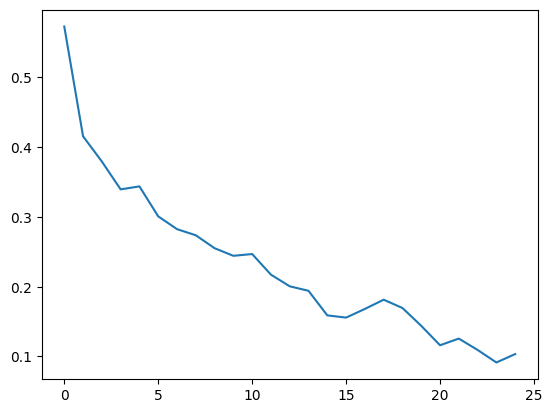

In [35]:
plt.plot( np.arange(len(loss_df)),np.array(loss_df))

In [36]:
vit

VisionTransformer(
  (patch_embedding): Conv2d(3, 128, kernel_size=(5, 5), stride=(5, 5))
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
test_inp = torch.from_numpy(x_test.values.reshape(len(x_test),3,20,20).astype(float))
test_inp = torch.clamp(inp,0,1)
test_inp

tensor([[[[0.0000e+00, 9.7845e-01, 0.0000e+00,  ..., 4.5184e-02,
           0.0000e+00, 7.0296e-01],
          [0.0000e+00, 5.5401e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0000e+00, 0.0000e+00],
          [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           8.3506e-01, 0.0000e+00],
          ...,
          [3.5884e-01, 0.0000e+00, 2.1953e-01,  ..., 2.9834e-01,
           3.8864e-01, 1.7029e-01],
          [8.2437e-01, 0.0000e+00, 5.4134e-01,  ..., 0.0000e+00,
           0.0000e+00, 7.8418e-01],
          [4.8284e-01, 1.0000e+00, 3.8534e-01,  ..., 5.2226e-01,
           0.0000e+00, 3.5099e-02]],

         [[0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 7.4908e-01,
           0.0000e+00, 0.0000e+00],
          [9.6579e-01, 2.5935e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0000e+00, 0.0000e+00],
          [1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0825e-01, 1.0000e+00],
          ...,
          [1.3879e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000

In [39]:
y_pred = torch.argmax(vit(torch.from_numpy(x_test.values.reshape(len(x_test),3,20,20)).float()),axis=1)

In [40]:
print('accuracy score : ' , accuracy_score(y_pred,y_test))
print('f1 score : ', f1_score(y_pred,y_test))

accuracy score :  0.8714285714285714
f1 score :  0.6683046683046683


# Loading Test Dataset

In [41]:
test = pd.read_csv('/Users/suyashk11/Desktop/VLG_Project/test.csv')
test1 = test.drop(columns='id')
test1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [30]:
test_tensor = torch.from_numpy(test1.values.reshape(len(test1),3,20,20)).float()

In [31]:
pred1 = torch.argmax(vit(test_tensor[:1200]), axis = -1)
pred2 = torch.argmax(vit(test_tensor[1200:2250]), axis = -1)
pred = np.concatenate((pred1,pred2),axis=0)

In [32]:
result_df = pd.DataFrame(pred,columns=['labels'])
result_df['id']= np.arange(1,len(pred)+1,1)
final_pred = result_df.set_index('id')
final_pred

,labels
id,
1,0
2,1
3,1
4,0
5,0
...,...
2246,0
2247,0
2248,1


In [33]:
final_pred.to_csv('/Users/suyashk11/Desktop/VLG_Project/vit_prediction.csv')

* VisionTransformer(
  (patch_embedding): Conv2d(3, 128, kernel_size=(5, 5), stride=(5, 5))
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

Hyper parameters : batch_size = 64 , epochs = 10 , lr =0.0001, patch_size = 5 ,dim = 128 ==> loss = 0.217 which is a big improvement against the best result in CNN Model (loss was 0.313) . Accuracy score on validation dataset was 82.48%

lr changed to 0.00007 ==> loss = 0.244, accuracy = 79.61%

epochs changed to 15 ==> loss = 0.207 , accuracy = 83.81% , f1_score 54%

lr changed to 0.0001 with 15 epochs ==> loss = 0.159 , accuracy = 84.29% , f1_score 70%

epochs changed to 25 ==> loss = 0.103 , accuracy = 87.14% , fl_score 67%